## Import required packages

In [2]:
# import libraries for reading data, exploring and plotting
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# library for train test split
from sklearn.model_selection import train_test_split
# deep learning libraries for text pre-processing
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences# Modeling 
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Dropout, LSTM, Bidirectional


## Loading and Analysis of Data

In [3]:
# Reading the dataset
messages=pd.read_csv("/kaggle/input/smsspamcollection/SMSSpamCollection",sep ='\t',names=["label", "message"])
messages[:3]

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [4]:
# Dmessages.groupby('label').describe().Tisplaying the statistics 
messages.describe()


,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [5]:
# To display the duplicate rows
duplicatedRow = messages[messages.duplicated()]
print(duplicatedRow[:5])

    label                                            message
103   ham  As per your request 'Melle Melle (Oru Minnamin...
154   ham  As per your request 'Melle Melle (Oru Minnamin...
207   ham  As I entered my cabin my PA said, '' Happy B'd...
223   ham                             Sorry, I'll call later
326   ham                   No calls..messages..missed calls


In [6]:
#To checke whether data is balanced or not
messages.groupby('label').describe().T

label                              ham  \
message count                     4825   
        unique                    4516   
        top     Sorry, I'll call later   
        freq                        30   

label                                                        spam  
message count                                                 747  
        unique                                                653  
        top     Please call our customer service representativ...  
        freq                                                    4

In [7]:
# Get all the ham and spam emails
ham_msg = messages[messages.label =='ham']
spam_msg = messages[messages.label=='spam']# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_msg.message.to_numpy().tolist())
spam_msg_text = " ".join(spam_msg.message.to_numpy().tolist())

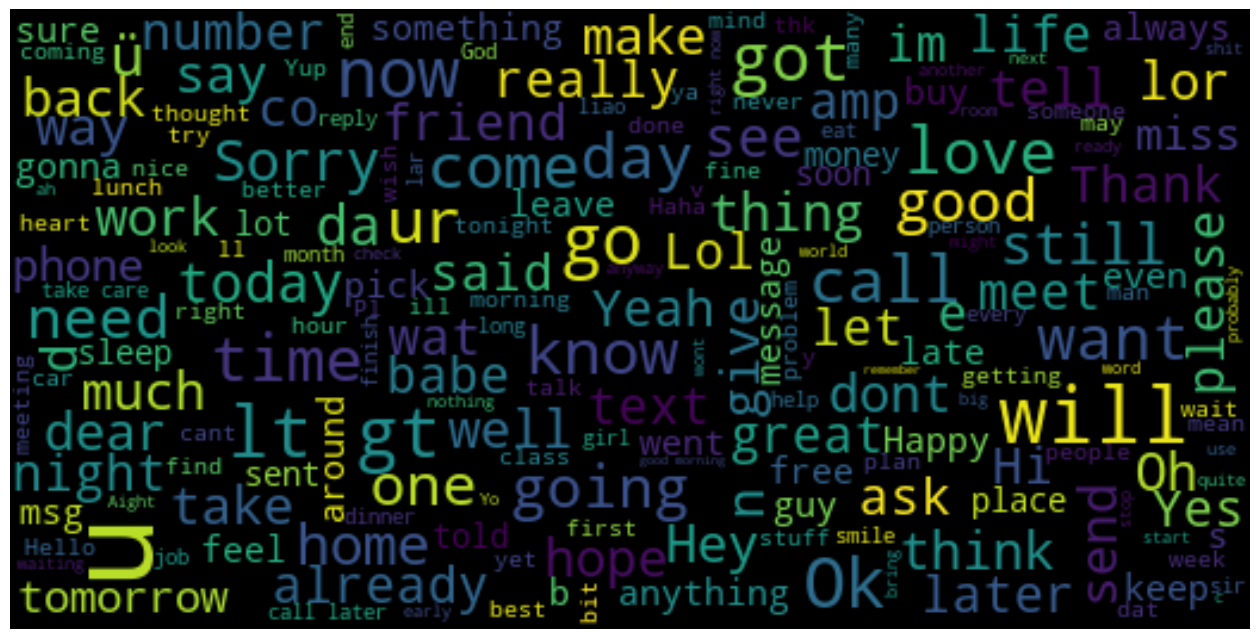

In [8]:
# wordcloud of ham messages
ham_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black").generate(ham_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(ham_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

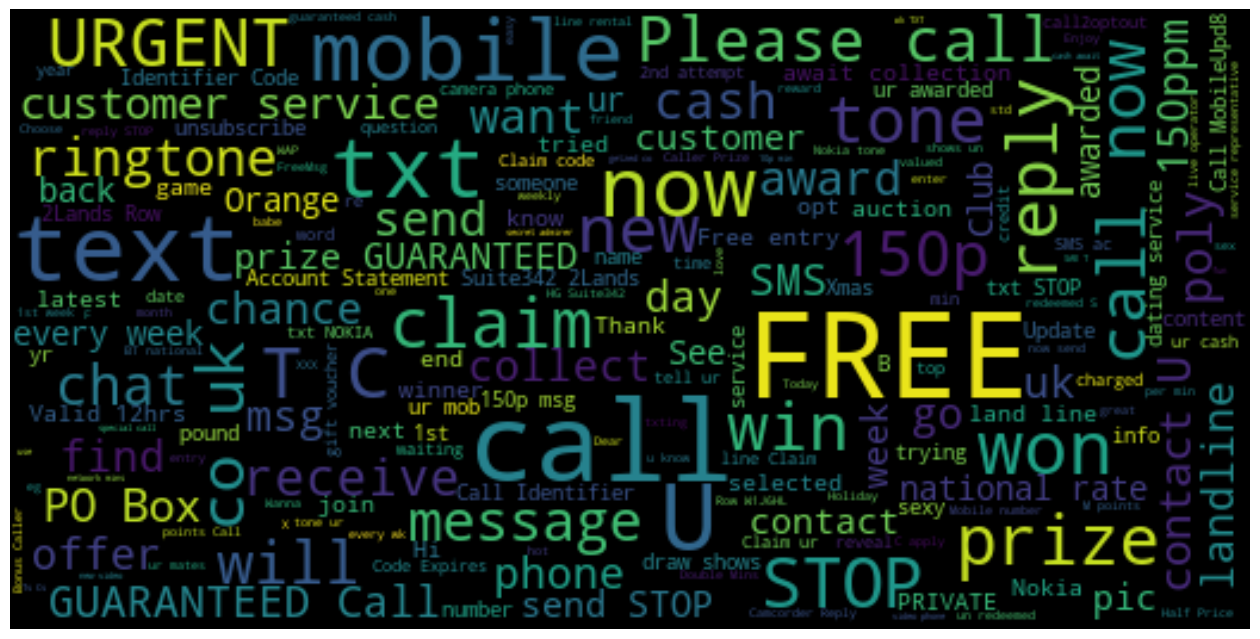

In [9]:
# wordcloud of spam messages
spam_msg_cloud = WordCloud(width =520, height =260, stopwords=STOPWORDS,max_font_size=50, background_color ="black").generate(spam_msg_text)
plt.figure(figsize=(16,10))
plt.imshow(spam_msg_cloud, interpolation='bilinear')
plt.axis('off') # turn off axis
plt.show()

15.481865284974095

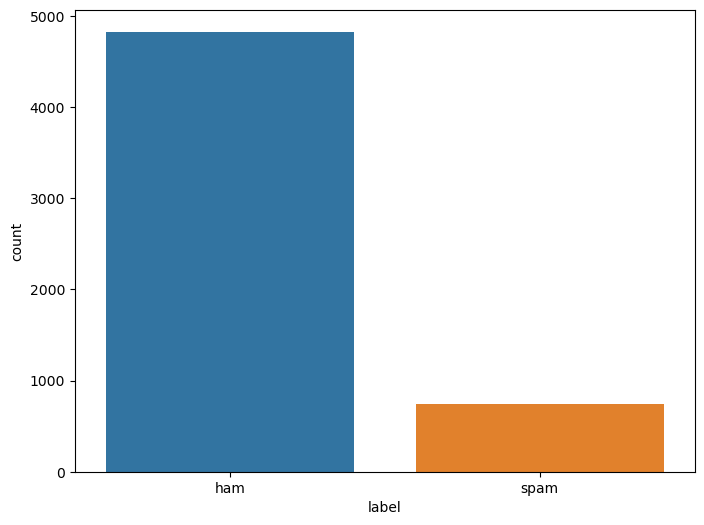

In [10]:
# we can observe imbalance data here 
plt.figure(figsize=(8,6))
sns.countplot(x=messages.label,data=messages)
# Percentage of spam messages
(len(spam_msg)/len(ham_msg))*100 # 15.48%

In [11]:
# one way to fix it is to downsample the ham msg
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)
spam_msg_df = spam_msg
print(ham_msg_df.shape, spam_msg_df.shape)

(747, 2) (747, 2)


Text(0.5, 0, 'Message types')

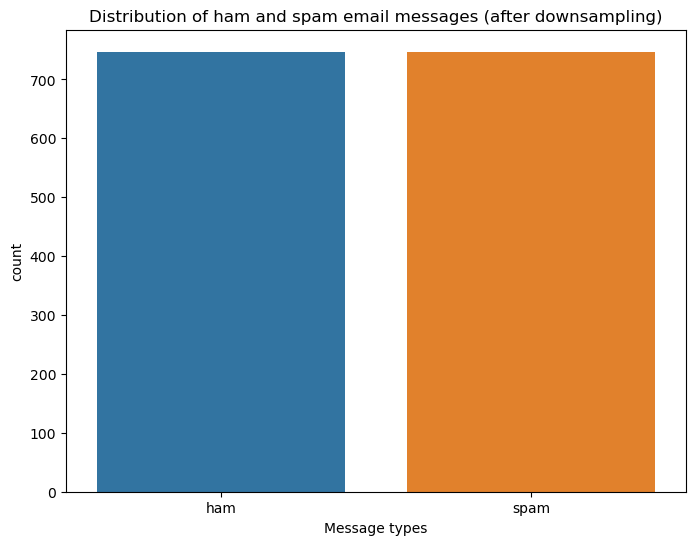

In [12]:
# Create a dataframe with these ham and spam msg
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(x=msg_df.label)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')

In [13]:
# Get length column for each text
msg_df['text_length'] = msg_df['message'].apply(len)#Calculate average length by label types
labels = msg_df.groupby('label').mean()
labels

#Average length of ham is 73 and that of spam is 138

,text_length
label,
ham,73.238286
spam,138.670683


## Test-Train spliltting and Pre-processing

In [14]:
# Map ham label as 0 and spam as 1
msg_df['msg_type']= msg_df['label'].map({'ham': 0, 'spam': 1})
msg_label = msg_df['msg_type'].values
# Split data into train and test
train_msg, test_msg, train_labels, test_labels = train_test_split(msg_df['message'], msg_label, test_size=0.2, random_state=434)

### Tokenization

In [15]:
# Defining pre-processing hyperparameters
max_len = 50 
trunc_type = "post" 
padding_type = "post" 
oov_tok = "<OOV>" 
vocab_size = 500

In [16]:
tokenizer = Tokenizer(num_words = vocab_size, char_level=False, oov_token = oov_tok)
tokenizer.fit_on_texts(train_msg)
# Get the word_index 
word_index = tokenizer.word_index
word_index

{'<OOV>': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'i': 5,
 'call': 6,
 'the': 7,
 'u': 8,
 'your': 9,
 'for': 10,
 'is': 11,
 '2': 12,
 'and': 13,
 'now': 14,
 'free': 15,
 'or': 16,
 'on': 17,
 'in': 18,
 'ur': 19,
 'have': 20,
 '4': 21,
 'txt': 22,
 'of': 23,
 'are': 24,
 'with': 25,
 'me': 26,
 'from': 27,
 'text': 28,
 'get': 29,
 'my': 30,
 'it': 31,
 'stop': 32,
 'just': 33,
 'mobile': 34,
 'this': 35,
 'will': 36,
 'be': 37,
 'no': 38,
 'that': 39,
 'claim': 40,
 'reply': 41,
 'can': 42,
 'so': 43,
 'send': 44,
 'www': 45,
 'we': 46,
 'only': 47,
 'our': 48,
 'not': 49,
 'out': 50,
 'at': 51,
 'do': 52,
 'if': 53,
 'prize': 54,
 'new': 55,
 'go': 56,
 'cash': 57,
 'but': 58,
 '150p': 59,
 'uk': 60,
 '1': 61,
 'nokia': 62,
 'who': 63,
 't': 64,
 'all': 65,
 'win': 66,
 'please': 67,
 'won': 68,
 'up': 69,
 'tone': 70,
 'when': 71,
 "i'm": 72,
 'week': 73,
 'been': 74,
 'what': 75,
 'msg': 76,
 '50': 77,
 'com': 78,
 'urgent': 79,
 'how': 80,
 'service': 81,
 'phone': 82,
 'time': 83,
 

In [17]:
# check how many words 
tot_words = len(word_index)
print('There are %s unique tokens in training data. ' % tot_words)

There are 4169 unique tokens in training data. 


### Sequencing & Padding

In [18]:
# Sequencing and padding on training and testing 
training_sequences = tokenizer.texts_to_sequences(train_msg)
training_padded = pad_sequences (training_sequences, maxlen = max_len, padding = padding_type, truncating = trunc_type )
testing_sequences = tokenizer.texts_to_sequences(test_msg)
testing_padded = pad_sequences(testing_sequences, maxlen = max_len,padding = padding_type, truncating = trunc_type)

In [19]:
# Shape of train tensor
print('Shape of training tensor: ', training_padded.shape)
print('Shape of testing tensor: ', testing_padded.shape)

Shape of training tensor:  (1195, 50)
Shape of testing tensor:  (299, 50)


In [20]:
# Before padding length
print(len(training_sequences[0]), len(training_sequences[1]))
# After padding length
print(len(training_padded[0]), len(training_padded[1]))

27 24
50 50


## Dense Spam Detection Model

In [21]:
vocab_size = 500 # As defined earlier
embeding_dim = 16
drop_value = 0.2 # dropout
n_dense = 24
#Dense model architecture
model = Sequential()
model.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model.add(GlobalAveragePooling1D())
model.add(Dense(24, activation='relu'))
model.add(Dropout(drop_value))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(loss='binary_crossentropy',optimizer='adam' ,metrics=['accuracy'])
# fitting a dense spam detector model
num_epochs = 50
early_stop = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)
model.save('Dense_Spam_Detection.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 16)            8000      
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 8,433
Trainable params: 8,433
Non-trainable params: 0
______________________________________________________

In [22]:
# Model performance on test data 
model.evaluate(testing_padded, test_labels)
# Read as a dataframe 
metrics = pd.DataFrame(history.history)
# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy', 'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)


10/10 [==============================] - 0s 2ms/step - loss: 0.1212 - accuracy: 0.9498


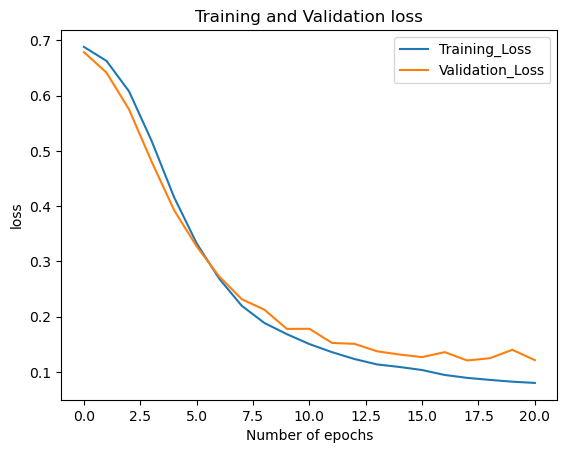

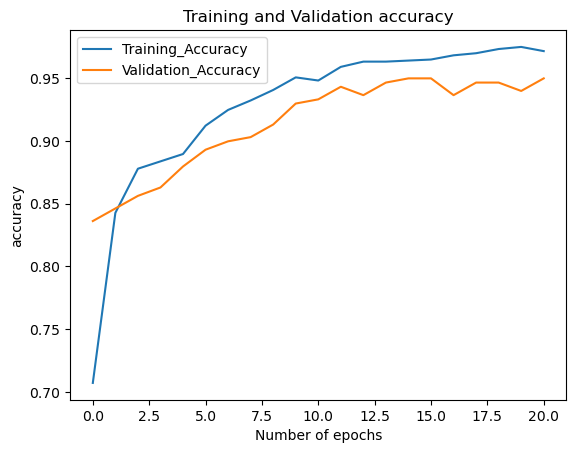

In [23]:
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

## Long Short Term Memory (LSTM) Model

In [32]:
#LSTM hyperparameters
n_lstm = 20
drop_lstm =0.2

#LSTM Spam detection architecture
model1 = Sequential()
model1.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model1.add(LSTM(n_lstm, dropout=drop_lstm))#return_sequences=True is giving error due to wrong dimensions 
model1.add(Dense(1, activation='sigmoid'))
model1.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=5)
history = model1.fit(training_padded, train_labels, epochs=num_epochs, validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)
model1.save('LSTM_Spam_Detection.h5')

Epoch 1/30
38/38 - 5s - loss: 0.6938 - accuracy: 0.4703 - val_loss: 0.6930 - val_accuracy: 0.4816 - 5s/epoch - 124ms/step
Epoch 2/30
38/38 - 1s - loss: 0.6712 - accuracy: 0.5448 - val_loss: 0.5509 - val_accuracy: 0.8395 - 1s/epoch - 28ms/step
Epoch 3/30
38/38 - 1s - loss: 0.3449 - accuracy: 0.9289 - val_loss: 0.3747 - val_accuracy: 0.9097 - 1s/epoch - 28ms/step
Epoch 4/30
38/38 - 1s - loss: 0.2306 - accuracy: 0.9381 - val_loss: 0.2866 - val_accuracy: 0.9264 - 1s/epoch - 30ms/step
Epoch 5/30
38/38 - 1s - loss: 0.1714 - accuracy: 0.9573 - val_loss: 0.2681 - val_accuracy: 0.9331 - 1s/epoch - 28ms/step
Epoch 6/30
38/38 - 1s - loss: 0.1924 - accuracy: 0.9448 - val_loss: 0.4493 - val_accuracy: 0.8963 - 1s/epoch - 28ms/step
Epoch 7/30
38/38 - 1s - loss: 0.1982 - accuracy: 0.9548 - val_loss: 0.2303 - val_accuracy: 0.9398 - 1s/epoch - 28ms/step
Epoch 8/30
38/38 - 1s - loss: 0.1396 - accuracy: 0.9674 - val_loss: 0.3505 - val_accuracy: 0.9130 - 1s/epoch - 28ms/step
Epoch 9/30
38/38 - 1s - loss: 0

In [35]:
model1.evaluate(testing_padded, test_labels)

10/10 [==============================] - 0s 8ms/step - loss: 0.1752 - accuracy: 0.9632


[0.1752106249332428, 0.9632107019424438]

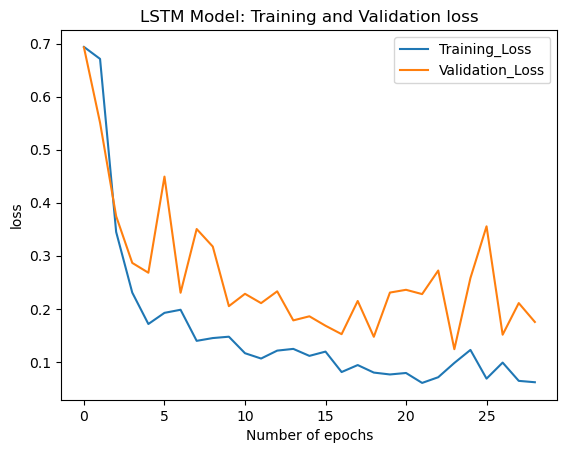

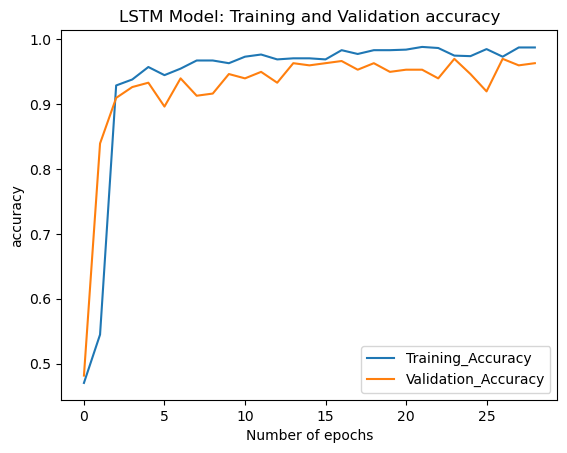

In [34]:
# Create a dataframe
metrics = pd.DataFrame(history.history)# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('LSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

## Bi-directional Long Short Term Memory (BiLSTM) Model

In [38]:
# Biderectional LSTM Spam detection architecture
model2 = Sequential()
model2.add(Embedding(vocab_size, embeding_dim, input_length=max_len))
model2.add(Bidirectional(LSTM(n_lstm, dropout=drop_lstm)))
model2.add(Dense(1, activation='sigmoid'))
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
# Training
num_epochs = 30
early_stop = EarlyStopping(monitor='val_loss', patience=4)
history = model2.fit(training_padded, train_labels, epochs=num_epochs, 
                    validation_data=(testing_padded, test_labels),callbacks =[early_stop], verbose=2)
model2.save('BiLSTM_Spam_Detection.h5')

Epoch 1/30
38/38 - 7s - loss: 0.6602 - accuracy: 0.6427 - val_loss: 0.5600 - val_accuracy: 0.6890 - 7s/epoch - 175ms/step
Epoch 2/30
38/38 - 1s - loss: 0.4356 - accuracy: 0.8402 - val_loss: 0.3815 - val_accuracy: 0.8462 - 1s/epoch - 34ms/step
Epoch 3/30
38/38 - 1s - loss: 0.2881 - accuracy: 0.9021 - val_loss: 0.2649 - val_accuracy: 0.9064 - 1s/epoch - 33ms/step
Epoch 4/30
38/38 - 1s - loss: 0.1981 - accuracy: 0.9331 - val_loss: 0.1966 - val_accuracy: 0.9398 - 1s/epoch - 34ms/step
Epoch 5/30
38/38 - 1s - loss: 0.1429 - accuracy: 0.9640 - val_loss: 0.1943 - val_accuracy: 0.9298 - 1s/epoch - 33ms/step
Epoch 6/30
38/38 - 1s - loss: 0.1095 - accuracy: 0.9682 - val_loss: 0.1453 - val_accuracy: 0.9264 - 1s/epoch - 33ms/step
Epoch 7/30
38/38 - 1s - loss: 0.0903 - accuracy: 0.9749 - val_loss: 0.0958 - val_accuracy: 0.9599 - 1s/epoch - 33ms/step
Epoch 8/30
38/38 - 1s - loss: 0.0841 - accuracy: 0.9732 - val_loss: 0.2025 - val_accuracy: 0.9365 - 1s/epoch - 33ms/step
Epoch 9/30
38/38 - 1s - loss: 0

In [39]:
model2.evaluate(testing_padded, test_labels)

10/10 [==============================] - 0s 8ms/step - loss: 0.1113 - accuracy: 0.9599


[0.11129250377416611, 0.9598662257194519]

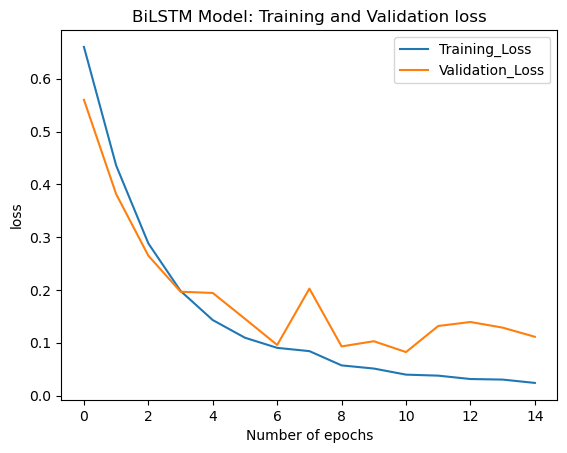

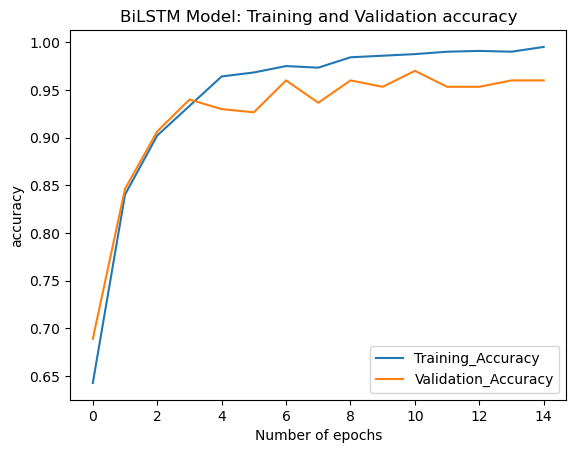

In [40]:
# Create a dataframe
metrics = pd.DataFrame(history.history)# Rename column
metrics.rename(columns = {'loss': 'Training_Loss', 'accuracy': 'Training_Accuracy',
                         'val_loss': 'Validation_Loss', 'val_accuracy': 'Validation_Accuracy'}, inplace = True)
def plot_graphs1(var1, var2, string):
    metrics[[var1, var2]].plot()
    plt.title('BiLSTM Model: Training and Validation ' + string)
    plt.xlabel ('Number of epochs')
    plt.ylabel(string)
    plt.legend([var1, var2])# Plot
plot_graphs1('Training_Loss', 'Validation_Loss', 'loss')
plot_graphs1('Training_Accuracy', 'Validation_Accuracy', 'accuracy')

## The accuracy of the models are as follows:-
### 1) Dense Network
### 2) Bi-LSTM
### 3) LSTM